## import package and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("F:\\PROJECTS\\twitter analysis nlp project\\train.csv")

## EDA

In [4]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [6]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [7]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [8]:
df = df.drop(['id'],axis=1)

In [9]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


# Graphical representation

C:\Users\HASAN SK\anaconda3\envs\DLA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


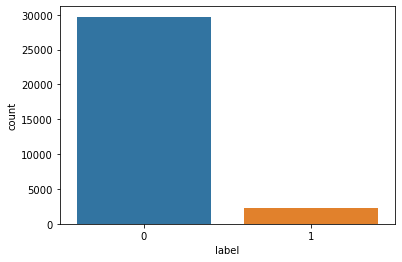

In [10]:
sns.countplot(df['label'])
plt.show()

# NLP PIPE LINE

In [11]:
len(df)

31962

In [12]:
import nltk

In [13]:
import sklearn

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [16]:
from nltk.corpus import stopwords

In [17]:
from nltk.stem import PorterStemmer,WordNetLemmatizer

In [18]:
lemi_var = WordNetLemmatizer()

In [19]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\HASAN
[nltk_data]     SK\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\HASAN
[nltk_data]     SK\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [21]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [22]:
import re

In [23]:
cleaned_data = []
for i in range(len(df)):
  result = re.sub("^a-zA-Z",' ',str(df['tweet'][i]))
  result = result.lower()
  result = result.split()
  result = [lemi_var.lemmatize(word) for word in result if not word in stopwords.words('english')]
  result = " ".join(result)
  cleaned_data.append(result)



In [24]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\HASAN
[nltk_data]     SK\AppData\Roaming\nltk_data...


True

In [25]:
cleaned_data[0]

'@user father dysfunctional selfish drag kid dysfunction. #run'

In [26]:
df['cleaned_data']= cleaned_data

In [27]:
df.head()

,label,tweet,cleaned_data
0,0,@user when a father is dysfunctional and is s...,@user father dysfunctional selfish drag kid dy...
1,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks #lyft credit can't use caus...
2,0,bihday your majesty,bihday majesty
3,0,#model i love u take with u all the time in ...,#model love u take u time urð±!!! ððð...
4,0,factsguide: society now #motivation,factsguide: society #motivation


In [28]:
df = df.drop(['tweet'],axis=1)

In [29]:
df.head()

,label,cleaned_data
0,0,@user father dysfunctional selfish drag kid dy...
1,0,@user @user thanks #lyft credit can't use caus...
2,0,bihday majesty
3,0,#model love u take u time urð±!!! ððð...
4,0,factsguide: society #motivation


# countvectorizer 

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
Co = CountVectorizer()

In [32]:
X = df['cleaned_data']
y = df['label']

In [33]:
X.head()

0    @user father dysfunctional selfish drag kid dy...
1    @user @user thanks #lyft credit can't use caus...
2                                       bihday majesty
3    #model love u take u time urð±!!! ððð...
4                      factsguide: society #motivation
Name: cleaned_data, dtype: object

In [34]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

# Spitting the data

In [35]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size= 0.25 , random_state = 42)

In [36]:
X_train.head()

19010                                              weekend
5474     world really going bonkers really bad atm. #sh...
6557                                    made night hahahha
3617     looking like really good person, stupid &amp; ...
5099     must first year ever xbox playstation killed #...
Name: cleaned_data, dtype: object

In [37]:
X_test.head()

12227    @user âmy mom say smile captivatingâ¦ say h...
14709    3 day meeting sis-n-law, couney bowers, first ...
19319    hating conservative homophobe using tragedy wa...
4308     awee #scream #friday #acewellstucker #cynthiab...
24055    fathersday #fatherã¢ââs #day #god! #ãâ« #to...
Name: cleaned_data, dtype: object

# implementing the countvectorizer

In [38]:
X_train = Co.fit_transform(X_train)

In [39]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
X_train.shape

(23971, 33870)

In [41]:
X_train[0]

<1x33870 sparse matrix of type '<class 'numpy.int64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [42]:
X_test = Co.transform(X_test)

In [43]:
X_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
X_test.shape

(7991, 33870)

## implementation of different models

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [46]:
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [47]:
def logistic_classifer (x_train,x_test,y_train,y_test):
    classifer_log = LogisticRegression(multi_class='auto')
    classifer_log.fit(x_train,y_train)
    y_pred = classifer_log.predict(x_test)
    
    return print(f"train accuracy: {classifer_log.score(x_train,y_train)}\ntest accuracy: {classifer_log.score(x_test,y_test)}")

In [48]:
def random_classifer (x_train,x_test,y_train,y_test):
    classifer_ran = RandomForestClassifier(criterion='entropy')
    classifer_ran.fit(x_train,y_train)
    y_pred = classifer_ran.predict(x_test)
    
    return print(f"train accuracy: {classifer_ran.score(x_train,y_train)}\ntest accuracy: {classifer_ran.score(x_test,y_test)}")
 

In [49]:
def nighhbor_classifer (x_train,x_test,y_train,y_test):
    classifer_nig = KNeighborsClassifier(metric="minkowski",p = 2,n_neighbors=5)
    classifer_nig.fit(x_train,y_train)
    y_pred = classifer_nig.predict(x_test)
    
    return print(f"train accuracy: {classifer_nig.score(x_train,y_train)}\ntest accuracy: {classifer_nig.score(x_test,y_test)}")

In [50]:
def Xgboost_classifer (x_train,x_test,y_train,y_test):
    classifer_xg = XGBClassifier()
    classifer_xg.fit(x_train,y_train)
    y_pred = classifer_xg.predict(x_test)
    
    return print(f"train accuracy: {classifer_xg.score(x_train,y_train)}\ntest accuracy: {classifer_xg.score(x_test,y_test)}")

In [51]:
def svm_classifer (x_train,x_test,y_train,y_test):
    classifer_svm = SVC(C=1)
    classifer_svm.fit(x_train,y_train)
    y_pred = classifer_svm.predict(x_test)
    
    return print(f"train accuracy: {classifer_svm.score(x_train,y_train)}\ntest accuracy: {classifer_svm.score(x_test,y_test)}")

In [52]:
def print_score(x_train,x_test,y_train,y_test):
    print("logistic regression:\n")
    logistic_classifer(x_train,x_test,y_train,y_test)
    print("*"*100)
    print()
    
    print("random forest :\n")
    random_classifer(x_train,x_test,y_train,y_test)
    print("*"*100)
    print()
    
    print("K nearest neighbor:\n")
    nighhbor_classifer(x_train,x_test,y_train,y_test)
    print("*"*100)
    print()
    
    print("XGBoost:\n")
    Xgboost_classifer(x_train,x_test,y_train,y_test)
    print("*"*100)
    print()
    

    
    print("svm:\n")
    svm_classifer(x_train,x_test,y_train,y_test)
    print("*"*100)
    print()
    

In [53]:
print_score(X_train,X_test,y_train,y_test)

logistic regression:



C:\Users\HASAN SK\anaconda3\envs\DLA\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuracy: 0.9852321555212549
test accuracy: 0.9594543861844576
****************************************************************************************************

random forest :

train accuracy: 0.9998331317008051
test accuracy: 0.9572018520835941
****************************************************************************************************

K nearest neighbor:

train accuracy: 0.9469775979308331
test accuracy: 0.9406832686772619
****************************************************************************************************

XGBoost:

train accuracy: 0.961036252138
test accuracy: 0.9535727693655363
****************************************************************************************************

svm:

train accuracy: 0.9823119602853448
test accuracy: 0.9551995995494932
****************************************************************************************************



## balancing the data

In [54]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

C:\Users\HASAN SK\anaconda3\envs\DLA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


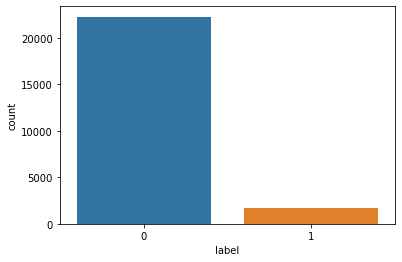

In [55]:
sns.countplot(y_train)
plt.show()

C:\Users\HASAN SK\anaconda3\envs\DLA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


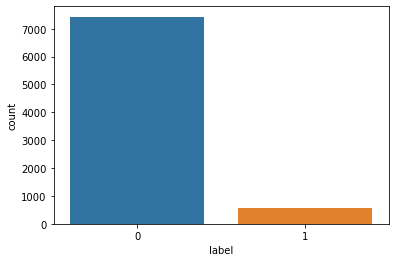

In [56]:
sns.countplot(y_test)
plt.show()

In [57]:
import imblearn

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
sm = SMOTE(random_state=42,k_neighbors=2)

In [60]:
x_train_bal,y_train_bal = sm.fit_resample(X_train,y_train)

In [61]:
x_test_bal,y_test_bal = sm.fit_resample(X_test,y_test)

C:\Users\HASAN SK\anaconda3\envs\DLA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


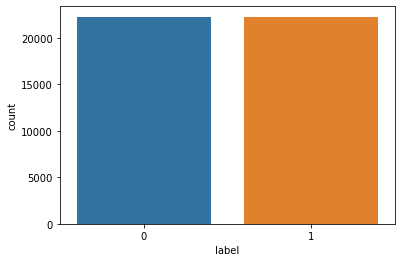

In [62]:
sns.countplot(y_train_bal)
plt.show()

C:\Users\HASAN SK\anaconda3\envs\DLA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


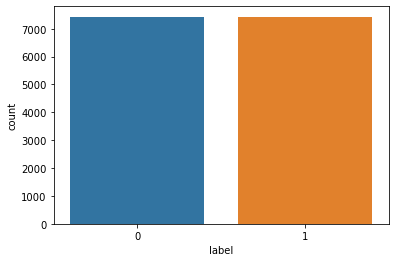

In [63]:
sns.countplot(y_test_bal)
plt.show()

In [64]:
print_score(x_train_bal,x_test_bal,y_train_bal,y_test_bal)

logistic regression:



C:\Users\HASAN SK\anaconda3\envs\DLA\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train accuracy: 0.9777683058147882
test accuracy: 0.9379036598493004
****************************************************************************************************

random forest :

train accuracy: 0.9994167264895908
test accuracy: 0.9235737351991389
****************************************************************************************************

K nearest neighbor:

train accuracy: 0.6700242282842785
test accuracy: 0.6326695371367062
****************************************************************************************************

XGBoost:

train accuracy: 0.9581164752333095
test accuracy: 0.8716361679224973
****************************************************************************************************

svm:

train accuracy: 0.9839599784637473
test accuracy: 0.9428821313240043
****************************************************************************************************



## here standrad vector mechine is giving the best results so we choose that one


In [65]:
model = SVC(C=1,probability=True)

In [66]:
model.fit(x_train_bal,y_train_bal)

SVC(C=1, probability=True)

In [67]:
y_train_predict = model.predict(x_train_bal)

In [68]:
y_test_predict = model.predict(x_test_bal)

In [69]:
accuracy_score(y_train_bal,y_train_predict)

0.9839599784637473

In [70]:
accuracy_score(y_test_bal,y_test_predict)

0.9428821313240043

In [71]:
confusion_matrix(y_train_bal,y_train_predict)

array([[22035,   253],
       [  462, 21826]], dtype=int64)

In [72]:
confusion_matrix(y_test_bal,y_test_predict)

array([[7135,  297],
       [ 552, 6880]], dtype=int64)

In [73]:
print(classification_report(y_train_bal,y_train_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     22288
           1       0.99      0.98      0.98     22288

    accuracy                           0.98     44576
   macro avg       0.98      0.98      0.98     44576
weighted avg       0.98      0.98      0.98     44576



In [74]:
print(classification_report(y_test_bal,y_test_predict))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7432
           1       0.96      0.93      0.94      7432

    accuracy                           0.94     14864
   macro avg       0.94      0.94      0.94     14864
weighted avg       0.94      0.94      0.94     14864



## ROC and AUC 

In [75]:
from sklearn.metrics import roc_auc_score , roc_curve

In [76]:
y_test_auc = model.predict_proba(x_test_bal)[: , 1]

In [77]:
y_test_auc

array([4.71766444e-04, 3.35563037e-03, 9.12235251e-03, ...,
       9.76607126e-01, 9.76553391e-01, 9.76607126e-01])

In [78]:
fpr , tpr , threshold = roc_curve(y_test_bal,y_test_auc)

In [79]:
print("FPR = \n\n",fpr)
print('-'*100)
print('TPR = \n\n',tpr)


FPR = 

 [0.         0.         0.         ... 0.99327234 0.99354144 1.        ]
----------------------------------------------------------------------------------------------------
TPR = 

 [0.00000000e+00 6.72766416e-04 1.61463940e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


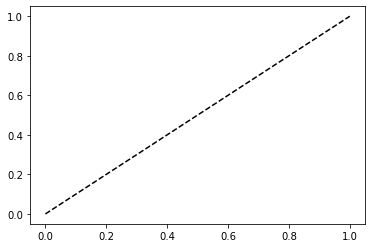

In [80]:
plt.plot([0, 1], [0, 1], "k--", label = '50% AUC')

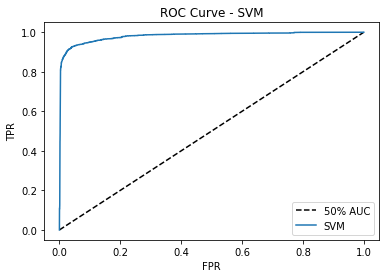

In [81]:
plt.plot([0, 1], [0, 1], "k--", label = '50% AUC')
plt.plot(fpr, tpr, label = "SVM")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - SVM")
plt.legend(loc = 0)
plt.show()

In [82]:
roc_auc_score(y_test_bal,y_test_auc)

0.981530642808395

## Saving the file

In [83]:
import pickle

In [84]:
with open ('count_vec.pkl','wb') as f:
  pickle.dump(Co,f)

In [85]:
ch = pickle.load(open('count_vec.pkl','rb'))

In [86]:
a = ['my name is hasan am i data scientist']

In [87]:
b = ch.transform(a)

In [88]:
b = b.toarray()

In [89]:
with open ('twitter_analysis.pkl','wb') as p:
  pickle.dump(model,p)

In [90]:
sol = pickle.load(open('twitter_analysis.pkl','rb'))

In [91]:
sol.predict(b)

array([0], dtype=int64)